In [1]:
import os
import sys

sys.path.append('/home/robinm/phd/problog/')



In [2]:
from problog.program import PrologString
from problog.prolog_engine.translate import TranslatedProgram, translate_clausedb
from problog.engine import DefaultEngine
from problog.logic import Term, Var
from problog.prolog_engine.engine_prolog import EngineProlog
from problog.formula import LogicFormula, LogicDAG
from graphviz import Source
from problog.cycles import break_cycles
from problog.sdd_formula import SDD

In [3]:
file = '''
0.6::edge(1,2).
0.1::edge(1,3).
0.4::edge(2,5).
0.3::edge(2,6).
0.3::edge(3,4).
0.8::edge(4,5).
0.2::edge(5,6).

path(X,Y) :- edge(X,Y).
path(X,Y) :- edge(X,Z),
             Y \== Z,
         path(Z,Y).


query(path(1,5)).
query(path(1,6)).


'''

# ProbLog

In [4]:
program = PrologString(file)
engine = DefaultEngine()
db = engine.prepare(program)

1: atom(identifier=0, probability=0.6, group=None, name=edge(1,2), source=edge(1,2), is_extra=False)
2: atom(identifier=2, probability=0.1, group=None, name=edge(1,3), source=edge(1,3), is_extra=False)
3: atom(identifier=3, probability=0.4, group=None, name=edge(2,5), source=edge(2,5), is_extra=False)
4: atom(identifier=4, probability=0.3, group=None, name=edge(2,6), source=edge(2,6), is_extra=False)
5: conj(children=(1, 3), name=None)
6: atom(identifier=5, probability=0.3, group=None, name=edge(3,4), source=edge(3,4), is_extra=False)
7: atom(identifier=6, probability=0.8, group=None, name=edge(4,5), source=edge(4,5), is_extra=False)
8: conj(children=(6, 7), name=None)
9: conj(children=(2, 8), name=None)
10: disj(children=(5, 9), name=path(1,5))
11: atom(identifier=7, probability=0.2, group=None, name=edge(5,6), source=edge(5,6), is_extra=False)
12: conj(children=(3, 11), name=None)
13: disj(children=(4, 12), name=None)
14: conj(children=(1, 13), name=None)
15: conj(children=(7, 11), n

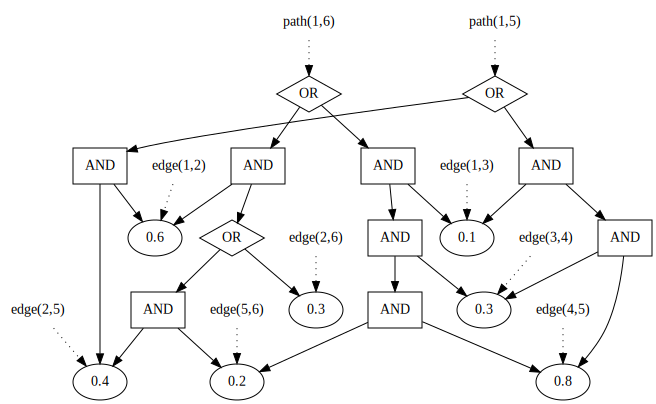

In [5]:
ground = engine.ground_all(db, target=LogicFormula(keep_all=False))
print(ground)
Source(ground.to_dot())

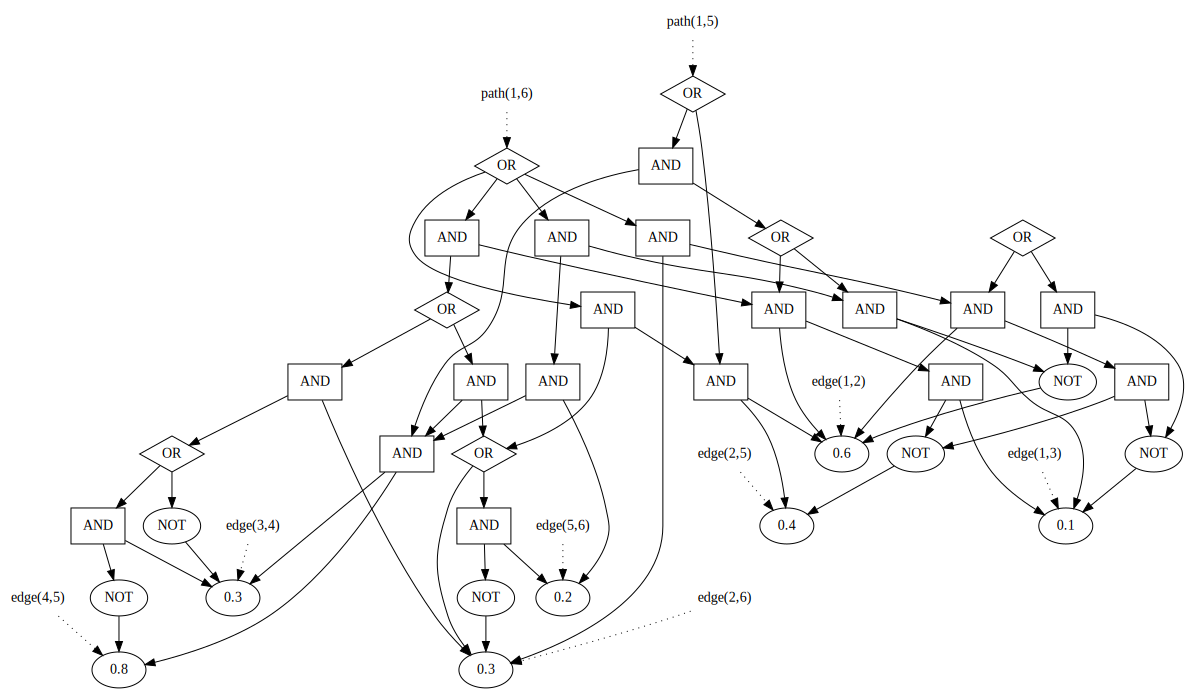

In [6]:
ac = SDD.create_from(ground)
Source(ac.to_dot())

In [7]:
ac.evaluate()

{path(1,5): 0.25824, path(1,6): 0.2167296}

# New engine

In [8]:
program = PrologString(file)
engine = EngineProlog()
db = engine.prepare(program)
transformed = translate_clausedb(db)
for l in transformed.get_lines():
    print(l+'.')

ad([p(0.6,edge(1,2),1)],[]).
ad([p(0.1,edge(1,3),2)],[]).
ad([p(0.4,edge(2,5),3)],[]).
ad([p(0.3,edge(2,6),4)],[]).
ad([p(0.3,edge(3,4),5)],[]).
ad([p(0.8,edge(4,5),6)],[]).
ad([p(0.2,edge(5,6),7)],[]).
ad([p(1.0,path(A1,A2),8)],[edge(A1,A2)]).
ad([p(1.0,path(A1,A2),9)],[edge(A1,A3),\==(A2,A3),path(A3,A2)]).
ad([p(1.0,query(path(1,5)),10)],[]).
ad([p(1.0,query(path(1,6)),11)],[]).


In [10]:
proofs = transformed.get_proofs('path(1,5)')
for p in proofs:
    print(p)

UnknownClause: No clauses found for 'Caused by: 'prove(path(1,5),Q,Proof)'. Returned: 'unknown_clause(edge(1, 5))'.' at character 0.

In [ ]:
ground = engine.ground_all(db, target=LogicFormula())
print(ground)
Source(ground.to_dot())

In [ ]:
dag = break_cycles(ground, LogicDAG())
print(dag)

In [ ]:
ac = SDD.create_from(dag)
Source(ac.to_dot())

In [ ]:
ac.evaluate()